# POC: Timeline Generator for Events
Hello, welcome to timeline generator for events!

Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html
<br> Author: Sydney Teo
<br> Mentors: Suren and Rauf
<br> Last updated: 27 July 2023

## Run this to import necessary libraries

In [3]:
import openpyxl
from datetime import datetime
from IPython.display import display
import pandas as pd
from datetime import datetime, time
import io
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import itertools
from collections import defaultdict

## Version 1: Run this to upload your .xlsx file
Instructions
- Please refer to the sample excel for the datetime format eg 1/7/2023  1:01:12 AM  
- There should also be 3 columns in you excel file <br>
- The timeline will be generated automatically after you upload your .xlsx file. This is more suitable for timeline that are seconds apart

In [32]:
dates_array = []
events_array = []
desc_array = []


def generate_timeline(dates, events):
    levels = np.tile([-5, 5, -3, 3, -1, 1],
                     int(np.ceil(len(dates)/6)))[:len(dates)]

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
    ax.set(title="POC for CTI Timeline Project")

    ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
    ax.plot(dates, np.zeros_like(dates), "-o",
            color="k", markerfacecolor="w")  # Baseline and markers on it.

    # annotate lines
    for d, l, r in zip(dates, levels, events):
        ax.annotate(r, xy=(d, l),
                    xytext=(-3, np.sign(l)*3), textcoords="offset points",
                    horizontalalignment="right",
                    verticalalignment="bottom" if l > 0 else "top")

    # format x-axis with 4-month intervals
    # ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    # ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d %Y\n%H:%M:%S"))
    # plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d %Y\n%H:%M:%S"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y-axis and spines
    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

    ax.margins(y=0.1)
    plt.show()

def read_excel_data(change):
    file_content = change['new'][0]['content']
    if file_content:
        workbook = openpyxl.load_workbook(io.BytesIO(file_content))
        sheet = workbook.active

        for row in sheet.iter_rows(min_row=2, values_only=True):
            date_time, event, desc = row

            # Handle missing values for date_time
            if date_time is not None:
                try:
                    date_time_str = date_time.strftime("%m/%d/%Y %I:%M:%S %p")
                    date_time_parsed = datetime.strptime(date_time_str, "%m/%d/%Y %I:%M:%S %p")
                except (TypeError, ValueError):
                    # Skip this row if date parsing fails
                    continue
            else:
                date_time_parsed = None

            # Handle missing values for event
            if event is None:
                event = ""

            # Handle missing values for desc
            if desc is None:
                desc = ""

            # Append the parsed data to the respective arrays
            dates_array.append(date_time_parsed)
            events_array.append(event)
            desc_array.append(desc)
            
# Create a file upload widget
upload_widget = widgets.FileUpload(accept='.xlsx')

# Register the callback function for file upload
upload_widget.observe(read_excel_data, names='value')

# Display the file upload widget
display(upload_widget)

FileUpload(value=(), accept='.xlsx', description='Upload')

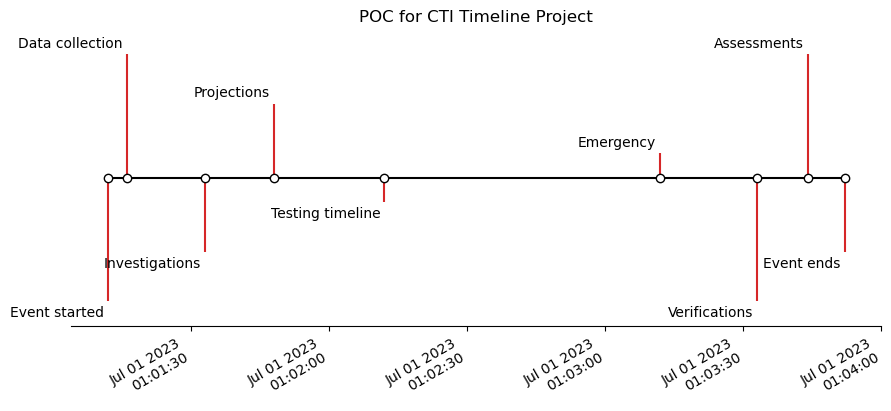

,Date,Events,Description
0,2023-07-01 01:01:12,Event started,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum"
1,2023-07-01 01:01:16,Data collection,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum"
2,2023-07-01 01:01:33,Investigations,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum"
3,2023-07-01 01:01:48,Projections,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum"
4,2023-07-01 01:02:12,Testing timeline,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum"
5,2023-07-01 01:03:12,Emergency,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum"
6,2023-07-01 01:03:33,Verifications,
7,2023-07-01 01:03:44,Assessments,
8,2023-07-01 01:03:52,Event ends,


In [33]:
generate_timeline(dates_array, events_array)
df = pd.DataFrame({"Date": dates_array, "Events": events_array, "Description": desc_array})
pd.set_option('display.max_colwidth', None)
df

## Version 2: Run this to upload your .xlsx file
Instructions
- Please refer to the sample excel for the datetime format eg 1/7/2023  1:01:12 AM  
- There should also be 3 columns in you excel file <br>
- The timeline will be generated automatically after you upload your .xlsx file. This is more suitable for timeline that are the start and end date are further apart

FileUpload(value=(), accept='.xlsx', description='Upload')

[datetime.date(2023, 7, 1), datetime.date(2023, 7, 3), datetime.date(2023, 7, 5), datetime.date(2023, 7, 10), datetime.date(2023, 7, 12), datetime.date(2023, 7, 16)]


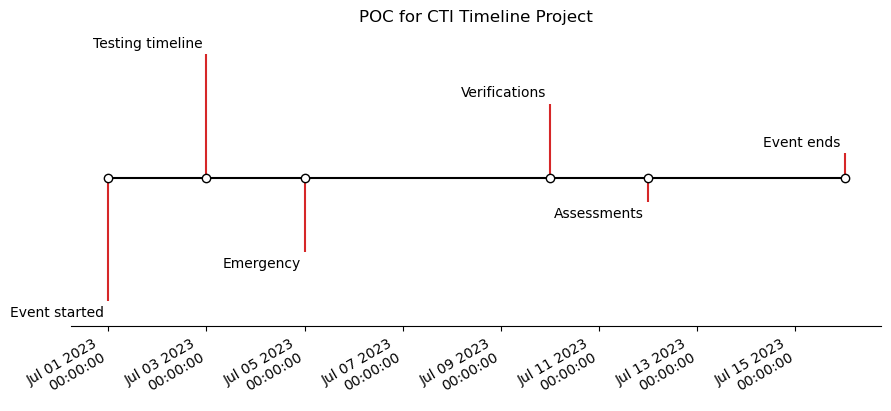

In [83]:
dates_array = []
events_array = []
desc_array = []

def generate_timeline(dates, events):
    levels = np.tile([-5, 5, -3, 3, -1, 1],
                     int(np.ceil(len(dates)/6)))[:len(dates)]

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
    ax.set(title="POC for CTI Timeline Project")

    ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
    ax.plot(dates, np.zeros_like(dates), "-o",
            color="k", markerfacecolor="w")  # Baseline and markers on it.

    # annotate lines
    for d, l, r in zip(dates, levels, events):
        ax.annotate(r, xy=(d, l),
                    xytext=(-3, np.sign(l)*3), textcoords="offset points",
                    horizontalalignment="right",
                    verticalalignment="bottom" if l > 0 else "top")

    # format x-axis with 4-month intervals
    # ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    # ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d %Y\n%H:%M:%S"))
    # plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d %Y\n%H:%M:%S"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y-axis and spines
    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

    ax.margins(y=0.1)
    plt.show()


def read_excel_data(change):
    file_content = change['new'][0]['content']
    if file_content:
        workbook = openpyxl.load_workbook(io.BytesIO(file_content))
        sheet = workbook.active
        
        for row in sheet.iter_rows(min_row=2, values_only=True):
            date_time, event, desc = row

            # Handle missing values for date_time
            if date_time is not None:
                try:
                    date_time_str = date_time.strftime("%m/%d/%Y %I:%M:%S %p")
                    date_time_parsed = datetime.strptime(date_time_str, "%m/%d/%Y %I:%M:%S %p")
                except (TypeError, ValueError):
                    # Skip this row if date parsing fails
                    continue
            else:
                date_time_parsed = None

            # Handle missing values for event
            if event is None:
                event = ""

            # Handle missing values for desc
            if desc is None:
                desc = ""

            # Append the parsed data to the respective arrays
            dates_array.append(date_time_parsed)
            events_array.append(event)
            desc_array.append(desc)

        # Create dictionaries to group events and descriptions by date (ignoring time)
        grouped_events = defaultdict(list)
        grouped_desc = defaultdict(list)

        for row in sheet.iter_rows(min_row=2, values_only=True):
            date_time, event, desc = row

            # Handle missing values for date_time
            if date_time is not None:
                try:
                    date_time_str = date_time.strftime("%m/%d/%Y %I:%M:%S %p")
                    date_time_parsed = datetime.strptime(date_time_str, "%m/%d/%Y %I:%M:%S %p")
                except (TypeError, ValueError):
                    # Skip this row if date parsing fails
                    continue
            else:
                date_time_parsed = None

            # Handle missing values for event
            if event is None:
                event = ""

            # Handle missing values for desc
            if desc is None:
                desc = ""

            # Group events and descriptions by date (ignoring time)
            grouped_events[date_time_parsed.date()].append(event)
            grouped_desc[date_time_parsed.date()].append(desc)

        # Take the earliest date, event, and description for each group
        unique_dates = sorted(grouped_events.keys())
        print(unique_dates)
        grouped_events_first_event = [grouped_events[date][0] for date in unique_dates]
        grouped_desc_first_desc = [grouped_desc[date][0] for date in unique_dates]
        generate_timeline(unique_dates, grouped_events_first_event)

# Create a file upload widget
upload_widget = widgets.FileUpload(accept='.xlsx')

# Register the callback function for file upload
upload_widget.observe(read_excel_data, names='value')

# Display the file upload widget
display(upload_widget)

In [149]:
df = pd.DataFrame({"Date": dates_array, "Events": events_array, "Description": desc_array})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [146]:

# Convert the "Date" column to datetime objects
df["Date"] = pd.to_datetime(df["Date"])

# Extract the date part (ignoring time) from the "Date" column
df["Date"] = df["Date"].dt.date

# Find the first occurrences of each unique date
first_date_mask = ~df.duplicated(subset="Date", keep='first')

df["Is_First_Unique_Date"] = first_date_mask


def highlight_first_date(row):
    styles = []
    for _, cell_value in row.items():
        if row["Is_First_Unique_Date"]:
            styles.append('background-color: yellow')
        else:
            styles.append('')
    return styles

# Apply the highlighting function to each row and store the result in a new DataFrame
styled_df = df.apply(highlight_first_date, axis=1, result_type="expand")

# Rename the columns to match the original DataFrame
styled_df.columns = df.columns

# Update the original DataFrame with the styles
df = df.style.apply(lambda x: styled_df, axis=None)

# Display the styled DataFrame with highlighted rows
# df


,Date,Events,Description,Is_First_Unique_Date
0,2023-07-01,Event started,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",True
1,2023-07-01,Data collection,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",False
2,2023-07-01,Investigations,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",False
3,2023-07-01,Projections,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",False
4,2023-07-03,Testing timeline,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",True
5,2023-07-05,Emergency,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",True
6,2023-07-10,Verifications,,True
7,2023-07-12,Assessments,,True
8,2023-07-16,Event ends,,True


In [148]:


# Convert the "Date" column to datetime objects
df["Date"] = pd.to_datetime(df["Date"])
df["Date_Datetime"] = pd.to_datetime(df["Date"])
# Extract the date part (ignoring time) from the "Date" column
df["Date"] = df["Date_Datetime"].dt.date


# Find the first occurrences of each unique date
first_date_mask = ~df.duplicated(subset="Date", keep='first')

df["Is_First_Unique_Date"] = first_date_mask



def highlight_first_date(row):
    styles = []
    for _, cell_value in row.items():
        if row["Is_First_Unique_Date"]:
            styles.append('background-color: yellow')
        else:
            styles.append('')
    return styles


df = df.drop(columns=["Date"])
df = df[["Date_Datetime", "Events", "Description", "Is_First_Unique_Date"]]
# Apply the highlighting function to each row and store the result in a new DataFrame
styled_df = df.apply(highlight_first_date, axis=1, result_type="expand")

# Rename the columns to match the original DataFrame
styled_df.columns = df.columns

# Update the original DataFrame with the styles
df = df.style.apply(lambda x: styled_df, axis=None)


df

,Date_Datetime,Events,Description,Is_First_Unique_Date
0,2023-07-01 01:01:12,Event started,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",True
1,2023-07-01 01:01:16,Data collection,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",False
2,2023-07-01 01:01:33,Investigations,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",False
3,2023-07-01 01:01:48,Projections,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",False
4,2023-07-03 01:01:48,Testing timeline,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",True
5,2023-07-05 01:03:12,Emergency,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",True
6,2023-07-10 01:03:33,Verifications,,True
7,2023-07-12 01:03:44,Assessments,,True
8,2023-07-16 01:03:52,Event ends,,True


In [150]:


# Convert the "Date" column to datetime objects
df["Date"] = pd.to_datetime(df["Date"])
df["Date_Datetime"] = pd.to_datetime(df["Date"])
# Extract the date part (ignoring time) from the "Date" column
df["Date"] = df["Date_Datetime"].dt.date

df["Count"] = df.groupby("Date")["Events"].transform("count")
# Find the first occurrences of each unique date
first_date_mask = ~df.duplicated(subset="Date", keep='first')

df["Is_First_Unique_Date"] = first_date_mask



def highlight_first_date(row):
    styles = []
    for _, cell_value in row.items():
        if row["Is_First_Unique_Date"]:
            styles.append('background-color: yellow')
        else:
            styles.append('')
    return styles


df = df.drop(columns=["Date"])
df = df[["Date_Datetime", "Events", "Description", "Is_First_Unique_Date", "Count"]]
# Apply the highlighting function to each row and store the result in a new DataFrame
styled_df = df.apply(highlight_first_date, axis=1, result_type="expand")

# Rename the columns to match the original DataFrame
styled_df.columns = df.columns

# Update the original DataFrame with the styles
df = df.style.apply(lambda x: styled_df, axis=None)


df

,Date_Datetime,Events,Description,Is_First_Unique_Date,Count
0,2023-07-01 01:01:12,Event started,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",True,4
1,2023-07-01 01:01:16,Data collection,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",False,4
2,2023-07-01 01:01:33,Investigations,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",False,4
3,2023-07-01 01:01:48,Projections,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",False,4
4,2023-07-03 01:01:48,Testing timeline,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",True,1
5,2023-07-05 01:03:12,Emergency,"Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum",True,1
6,2023-07-10 01:03:33,Verifications,,True,1
7,2023-07-12 01:03:44,Assessments,,True,1
8,2023-07-16 01:03:52,Event ends,,True,1


## End